In [1]:
import sys
assert sys.version_info >= (3, 5)

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import Matplotlib and Seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

You should consider upgrading via the '/Users/pjrooney/Website/files/research_summaries/tweets_summary/env/bin/python3 -m pip install --upgrade pip' command.


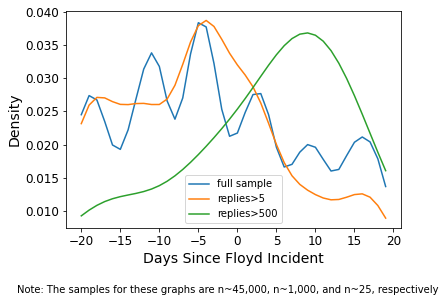

In [39]:
# Full Sample of Tweets (n~45,000), >5 Replies (n~1000), >500 Replies (n~30)
def draw_kdensity_graph(df):
    fig = plt.figure()
    ax = df['days_from_event'].plot.kde(ind=np.arange(-20, 20, 1).tolist(), legend=True)
    l_100 = df['days_from_event'][df['replies']>5].plot.kde(ind=np.arange(-20, 20, 1).tolist(), ax=ax, legend=True)
    l_5000 = df['days_from_event'][df['replies']>500].plot.kde(ind=np.arange(-20, 20, 1).tolist(), ax=ax, legend=True)
    ax.set_xlabel("Days Since Floyd Incident")
    ax.legend(['full sample', 'replies>5', 'replies>500'])
    fig.text(.5, -.1, 'Note: The samples for these graphs are n~45,000, n~1,000, and n~25, respectively', ha='center')
    plt.show()

In [10]:
def draw_replies_tweet_day_graph(df):
    sns.lineplot(data=df, x='days_from_event', y='likes_per_daily_tweets')
    plt.title('')
    plt.xlabel('Days since Floyd Incident')
    plt.ylabel('Number of likes per tweet')
    plt.title('Likes Per Tweet Per Day', fontsize='18')
    plt.show()

In [ ]:
def make_word_cloud(string, title):
    wc = WordCloud(width = 800, height = 800, background_color ='white', 
                   random_state = 1, min_font_size = 10).generate(string)
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wc) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=24)
    plt.show() 
    print("  ")
    print("  ")

In [ ]:
# def draw_sentiment_graph()
#    CHECK THE OTHER WEBSITE PAGE

In [ ]:
def draw_bigram_graph(vec, text_col, title):
    vec = TfidfVectorizer(ngram_range=(2,2))
    ngrams = vec.fit_transform(text_col)
    values = ngrams.toarray().sum(axis=0)
    vocab = vec.vocabulary_
    df_ngram = pd.DataFrame(sorted([(values[i],k) for k, i in vocab.items()], reverse=True)).rename(columns={0:'score', 1:'bigram'})
    ax = sns.barplot(x="score", y="bigram", data=df_ngram[:10]).set_title(title)
    # DO I NEED A PLOT STATEMENT HERE??

#df_tfidf_ngram_nonstance = make_df_ngram(df['stemmed_text'][df['floyd_action']==0], tfidf_vec_nonstance)
#ax = sns.barplot(x="score", y="bigram", data=df_tfidf_ngram_nonstance[:10]).set_title('TF-ID Frequency of Bigrams in Non-Stance Tweets')

#df_tfidf_ngram_stance = make_df_ngram(df['stemmed_text'][df['floyd_action']==1], tfidf_vec_stance)
#ax = sns.barplot(x="score", y="bigram", data=df_tfidf_ngram_stance[:10]).set_title('TF-ID Frequency of Bigrams in Stance Tweets')


In [ ]:
def draw_org_donation_graph(df):
    sns.histplot(data=df, x='ratio_index', stat='count')
    plt.title('Index of Org Donation Activity Ratios', fontsize=18)
    plt.xlabel('Index Ratio DEM/GOP')
    plt.ylabel('Frequency')
    plt.yticks(np.arange(0, 22, 2))
    plt.xlim(0, 1.05)
    plt.show()

In [ ]:
def draw_org_politics_time_stance_graph(df):
    # Among those who took stance, removing federal gov't entities (i.e., Fannie Mae, Freddie Mac)
    sns.regplot(data=df, x='stance_date', y='ratio_index', ci=None)
    plt.title('Stance Date by Org Politics', fontsize=18)
    plt.xlabel('Date Following Floyd Incident')
    plt.ylabel('% Democrat Orientation')
    plt.xlim(1, 15)
    plt.ylim(0.0, 1.01)
    plt.show()